In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import FunctionTransformer, make_pipeline
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder

In [2]:
relative_json_directory = '../reddit3_output'

In [3]:
json_directory = os.path.abspath(relative_json_directory)

In [4]:
file_paths = [os.path.join(json_directory, file) for file in os.listdir(json_directory) if file.endswith('.json')]

In [5]:
dataframes = [pd.read_json(file_path, lines=True) for file_path in file_paths]

In [6]:
combined_dataframe = pd.concat(dataframes, ignore_index=True)

In [7]:
label_encoder = LabelEncoder()
combined_dataframe['subreddit_encoded'] = label_encoder.fit_transform(combined_dataframe['subreddit'])
combined_dataframe['daytype_encoded'] = label_encoder.fit_transform(combined_dataframe['daytype'])

In [8]:
accuracy_scores = np.zeros(4)

In [9]:
# Separate features (X) and target (y)
#sentiment_score   readability_score   subreddit_encoded
X = np.stack([combined_dataframe['readability_score'],combined_dataframe['subreddit_encoded']], axis=1)
y = combined_dataframe['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
hidden_layer_sizes = tuple([4] * 3)
model = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(hidden_layer_sizes))
)

In [11]:
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier', MLPClassifier(hidden_layer_sizes=(4, 4, 4)))])

In [12]:
model.predict(X_test)
model.score(X_test,y_test)
accuracy_scores[0] = model.score(X_test, y_test)

In [13]:
# Separate features (X) and target (y)
#sentiment_score   readability_score   subreddit_encoded
X = np.stack([combined_dataframe['sentiment_score'],combined_dataframe['subreddit_encoded']], axis=1)
y = combined_dataframe['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
hidden_layer_sizes = tuple([4] * 3)
model2 = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(hidden_layer_sizes))
)

In [15]:
model2.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier', MLPClassifier(hidden_layer_sizes=(4, 4, 4)))])

In [16]:
model2.predict(X_test)
model2.score(X_test,y_test)
accuracy_scores[1] = model2.score(X_test, y_test)

In [17]:
# Separate features (X) and target (y)
#sentiment_score   readability_score   subreddit_encoded
X = np.stack([combined_dataframe['daytype_encoded'],combined_dataframe['subreddit_encoded']], axis=1)
y = combined_dataframe['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:

hidden_layer_sizes = tuple([4] * 3)
model3 = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(hidden_layer_sizes))
)

In [19]:
model3.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier', MLPClassifier(hidden_layer_sizes=(4, 4, 4)))])

In [20]:
model3.predict(X_test)
model3.score(X_test,y_test)
accuracy_scores[2] = model3.score(X_test, y_test)

In [21]:
# Separate features (X) and target (y)
#sentiment_score   readability_score   subreddit_encoded
X = np.stack([combined_dataframe['readability_score'],combined_dataframe['sentiment_score'],combined_dataframe['daytype_encoded'],combined_dataframe['subreddit_encoded']], axis=1)
y = combined_dataframe['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
hidden_layer_sizes = tuple([4] * 3)
model4 = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(hidden_layer_sizes))
)

In [23]:
model4.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier', MLPClassifier(hidden_layer_sizes=(4, 4, 4)))])

In [24]:
model4.predict(X_test)
model4.score(X_test,y_test)
accuracy_scores[3] = model4.score(X_test, y_test)

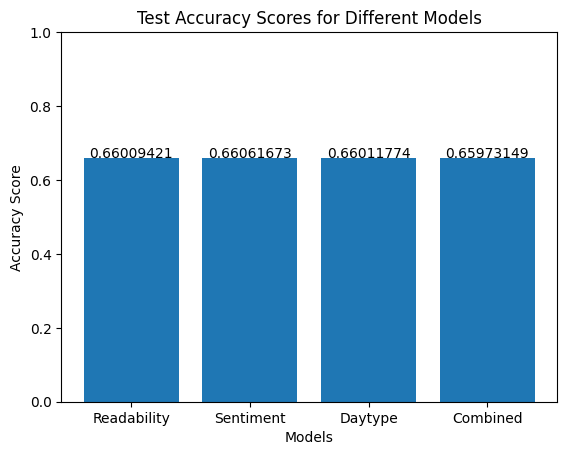

In [25]:
import matplotlib.pyplot as plt

# List of models and their accuracy scores
model_names = ['Readability', 'Sentiment', 'Daytype', 'Combined']
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],'{:.8f}'.format(y[i]),ha = 'center')

# Create a bar chart to visualize the accuracy scores
plt.bar(model_names, accuracy_scores)
addlabels(model_names, accuracy_scores)
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Test Accuracy Scores for Different Models')
plt.show()

In [26]:
accuracy_scores

array([0.66009421, 0.66061673, 0.66011774, 0.65973149])